<a href="https://colab.research.google.com/github/leocraig18/Data-Science-Analysis/blob/main/Determinants_of_Earnings_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [ ]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(2000, 96)

The dataframe we are analysing has 2000 rows and 96 columns.

In [ ]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

In [ ]:
print(f"Are there any missing values? {df_data.isna().values.any()}")
print(f"Are there any duplicates? {df_data.duplicated().values.any()}")


Are there any missing values? True
Are there any duplicates? True


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [ ]:
df_data[df_data.duplicated()]

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
1000,4693,14.50,12,7.25,0,1,1981,30,20.00,"40,700.00",...,1,0,0,0,1,0,1,0,0,0
1004,4827,38.48,16,8.50,0,1,1981,30,34.00,"27,700.00",...,0,1,0,0,0,0,1,0,0,0
1006,4176,4.29,16,2.04,0,1,1980,31,23.00,"2,500.00",...,1,0,0,1,0,0,1,0,0,0
1012,3256,10.00,12,8.02,0,1,1984,27,21.00,"43,000.00",...,0,0,1,0,0,0,1,0,0,0
1015,4600,52.00,17,9.08,0,1,1980,31,28.00,"48,900.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2740,14.00,12,12.44,1,0,1980,31,27.00,"81,800.00",...,1,0,1,0,0,0,1,0,0,0
1996,1119,14.83,18,1.92,1,0,1983,28,28.00,"50,000.00",...,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.67,1,0,1984,27,29.00,"77,610.00",...,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.71,1,0,1982,29,23.00,"69,300.00",...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df_data = df_data.drop_duplicates()
df_data

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2400,9.00,12,10.83,1,0,1982,29,29.00,"73,100.00",...,0,0,0,1,0,0,0,1,0,0
1989,3018,8.00,12,9.37,1,0,1982,29,23.00,"66,300.00",...,1,0,1,0,0,0,1,0,0,0
1991,4550,8.57,17,6.29,1,0,1984,27,25.00,"76,300.00",...,0,0,0,0,1,0,1,0,0,0
1994,3779,9.33,12,9.12,1,0,1984,27,22.00,NaN,...,1,0,0,1,0,0,1,0,0,0


There are 513 duplicate rows in the dataframe. I have dropped these rows as shown above where the df_data dataframe now has 1487 rows.




## Descriptive Statistics

In [ ]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

Using Seaborn .pairplot() I can visualise all the relationships at the same time.

I am going to specifically focus on experience, education, and earnings.

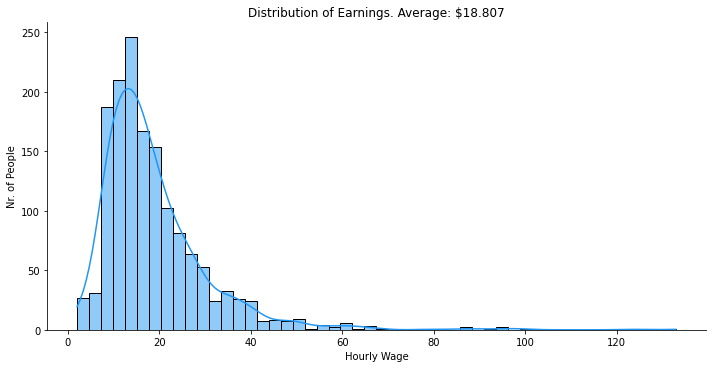

In [28]:
sns.displot(df_data.EARNINGS, 
            bins=50,
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Distribution of Earnings. Average: ${(df_data.EARNINGS.mean()):.6}')
plt.xlabel('Hourly Wage')
plt.ylabel('Nr. of People')

plt.show()

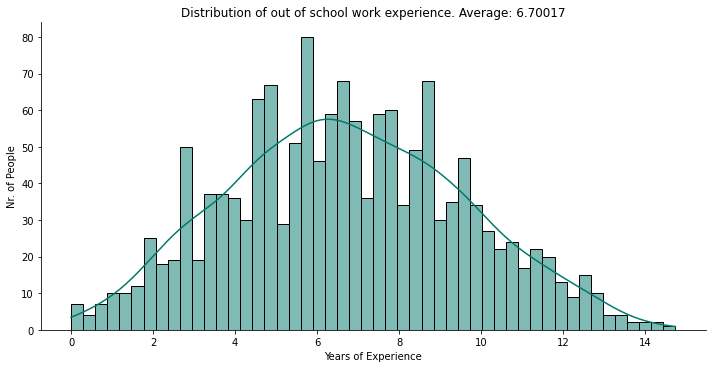

In [31]:
sns.displot(df_data.EXP, 
            bins=50,
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Distribution of out of school work experience. Average: {(df_data.EXP.mean()):.6}')
plt.xlabel('Years of Experience')
plt.ylabel('Nr. of People')

plt.show()

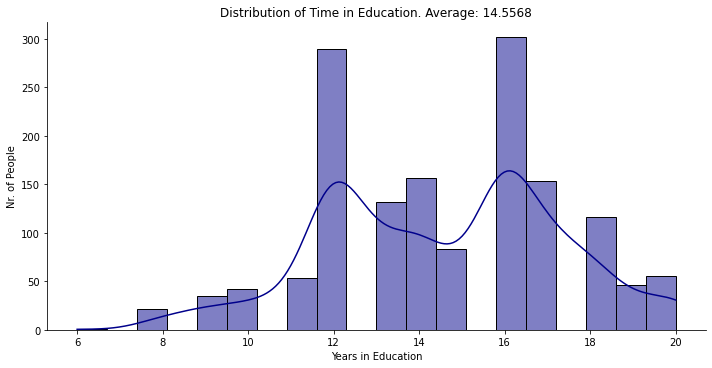

In [35]:
sns.displot(df_data.S,
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title(f'Distribution of Time in Education. Average: {(df_data.S.mean()):.6}')
plt.xlabel('Years in Education')
plt.ylabel('Nr. of People')

plt.show()

## Years in Education vs Earnings

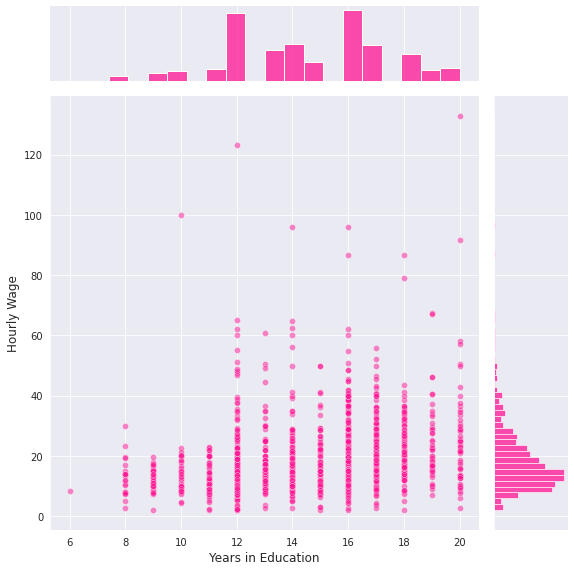

In [46]:
with sns.axes_style('darkgrid'):
  chart = sns.jointplot(x=df_data['S'], 
                y=df_data['EARNINGS'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})
chart.set_axis_labels('Years in Education', 'Hourly Wage', fontsize=12)

plt.show()

## Years of Experience vs Earnings

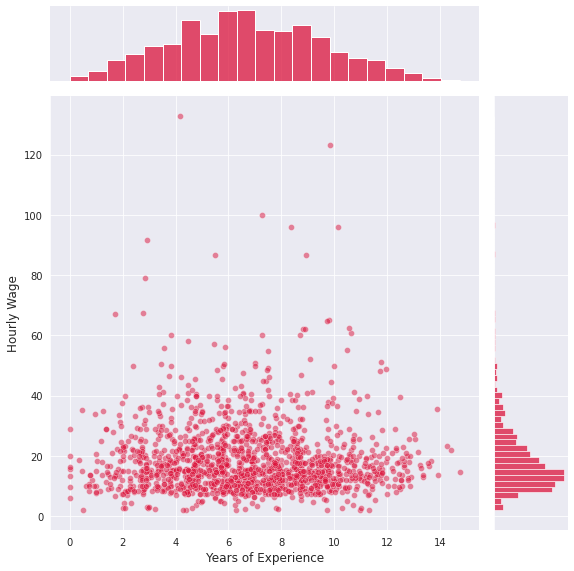

In [48]:
with sns.axes_style('darkgrid'):
  chart = sns.jointplot(x=df_data['EXP'], 
                y=df_data['EARNINGS'], 
                height=8, 
                kind='scatter',
                color='crimson', 
                joint_kws={'alpha':0.5})
chart.set_axis_labels('Years of Experience', 'Hourly Wage', fontsize=12)

plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [61]:
target = df_data['EARNINGS']
features = df_data[['S']]

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [62]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [64]:
education_regr = LinearRegression()
education_regr.fit(X_train, y_train)
rsquared = education_regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.081


In [78]:
education_regr.intercept_

1.0289074107474079

In [82]:
education_regr.coef_

array([1.21917798])

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

The above linear regressions intercent and coefficient allow us to interpret the relationship between the independent variable, Years in Education, and the dependent variable, Hourly Wage. 

The intercept represents the expected earnings of an individual with 0 years of education. The coefficient represents the estimated change in earnings associated with an increase of 1 year in education. So, based my regression results, the estimated linear relationship between S and EARNINGS is: 
`**EARNINGS = 1.0289074107474079 + 1.21917798 * S**`

This model therefore infers that an individual with zero years of education is predicted to earn `$1` per hour, and every additional year of education will increase the hourly wage by around `$1.2`.

However, the R-Squared for the model is very low. A low R-squared value indicates that the linear regression model does not fit the data well, implying that other factors that I have omitted from the univariate regression may be more important in explaining earnings. In general, a higher R-squared value would indicate a better fit of the model to the data.

The R-squared value for this univariate regression is `0.081`, indicating that only `8.1%` of the variation in earnings can be explained by years of education. 

In conclusion, the results of the univariate linear regression suggest that there is a positive relationship between years of education and earnings, but this relationship is not very strong, as the R-squared value is relatively low. Further analysis is necessary to understand the full picture of the relationship between years of education and earnings.






### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [83]:
predicted_vals = education_regr.predict(X_train)
residuals = (y_train - predicted_vals)

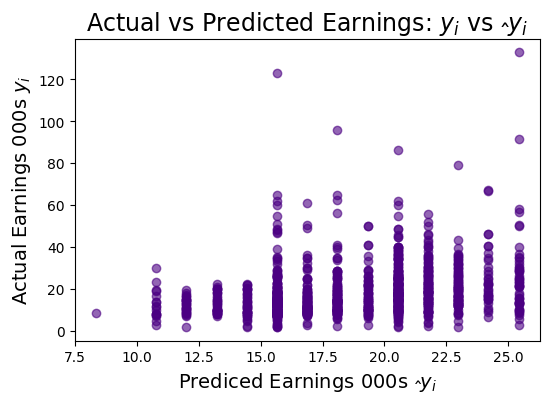

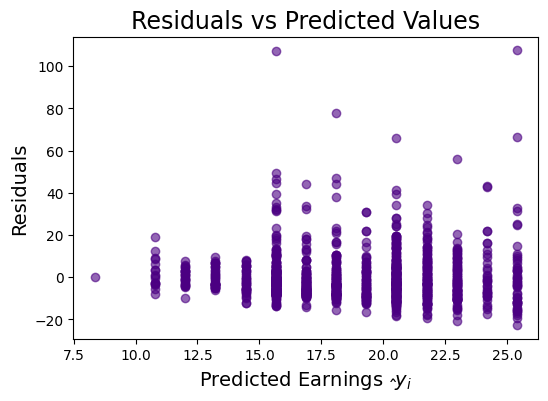

In [106]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(y=y_train, x=predicted_vals, c='indigo', alpha=0.6)
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Prediced Earnings 000s $\hat y _i$', fontsize=14)
plt.ylabel('Actual Earnings 000s $y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

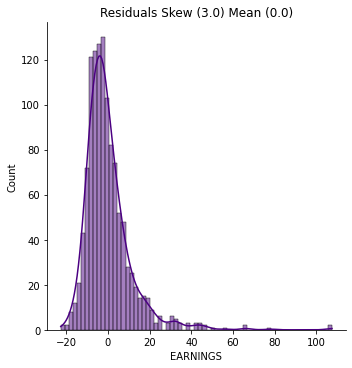

In [107]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [113]:
target = df_data['EARNINGS']
parameters = df_data[['S', 'EXP']]

multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(parameters, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [111]:
# % of training set
train_pct = 100*len(multi_X_train)/len(parameters)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*multi_X_test.shape[0]/parameters.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


In [114]:
multivariate_regr = LinearRegression()
multivariate_regr.fit(multi_X_train, multi_y_train)
rsquared = multivariate_regr.score(multi_X_train, multi_y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.12


### Evaluate the Coefficients of the Model

In [116]:
multivariate_regr.intercept_

-13.887792110638934

In [115]:
multivariate_regr.coef_

array([1.79422175, 0.97900689])

In [117]:
df_coef = pd.DataFrame(data=multivariate_regr.coef_, index=multi_X_train.columns, columns=['coef'])
df_coef

,coef
S,1.79
EXP,0.98


### Analyse the Estimated Values & Regression Residuals

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 